In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.callbacks import History 
import matplotlib.pyplot as plt
from keras.layers.convolutional import Conv1D,UpSampling1D
from keras.layers import Reshape
from keras.layers.convolutional import MaxPooling1D,AveragePooling1D
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras import Model, Sequential
from keras.callbacks import ModelCheckpoint
from keras import utils as np_utils
from keras.constraints import max_norm
from keras import optimizers

2022-05-30 23:15:05.458122: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-30 23:15:05.458137: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
pretrainfeats_df = pd.read_csv("pretrain_features.csv.zip")
pretrainfeats_df.head()


,Id,smiles,feature_0000,feature_0001,feature_0002,feature_0003,feature_0004,feature_0005,feature_0006,feature_0007,...,feature_0990,feature_0991,feature_0992,feature_0993,feature_0994,feature_0995,feature_0996,feature_0997,feature_0998,feature_0999
0,0,c1occ2c1c1ccc3cscc3c1c1ncc3cc(ccc3c21)-c1cccc2...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,C1C=c2c(cc3ncc4c5[SiH2]C=Cc5oc4c3c2=C1)-c1scc2...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,C1C=c2c3cccnc3c3c4c[nH]cc4c4cc(cnc4c3c2=C1)-c1...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,[SiH2]1C=Cc2c1csc2-c1cnc2c(c1)c1ccccc1c1cc3ccc...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,c1occ2c1c(cc1[se]c3ccncc3c21)-c1cccc2nsnc12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [3]:
pretrainlabs_df = pd.read_csv("pretrain_labels.csv.zip")
pretrainlabs_df.head()
pretrainlabs_df.shape

(50000, 2)

In [4]:
pre_train_x = pretrainfeats_df.drop(['Id', 'smiles'], axis=1).to_numpy()

In [5]:
pre_train_y = pretrainlabs_df.drop(['Id'], axis=1).to_numpy()

In [6]:

x_train, x_test, y_train, y_test = train_test_split(
    pre_train_x, pre_train_y, test_size=0.2
)


In [7]:
model = Sequential()
model.add(Dense(1000, activation='relu'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mean_squared_error",metrics=["mean_absolute_error"])

2022-05-30 23:15:20.496702: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-30 23:15:20.496731: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-30 23:15:20.496752: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (philipp-HP-ProBook): /proc/driver/nvidia/version does not exist
2022-05-30 23:15:20.497020: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
#model_autoencoder.fit(pre_train_x, pre_train_y, validation_split=0.2, epochs=20, verbose=2)

In [9]:
'''
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape = (1000))
        tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu')
        tf.keras.layers.Dropout(0.5)
        tf.keras.layers.MaxPooling1D(pool_size=2)
        tf.keras.layers.Flatten()
        #tf.keras.layers.MaxPooling1D(3)(500),
        #tf.keras.layers.Conv1D(100,10, activation='relu', padding='valid'),
        #tf.keras.layers.MaxPooling1D(3)(100),
        #tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(500, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        #tf.keras.layers.Dense(25, activation='relu'),
        tf.keras.layers.Dense(1)
    
    ])

# compile the model
model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=["mean_absolute_error"]
)
'''

'\nmodel = tf.keras.models.Sequential([\n        tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation=\'relu\', input_shape = (1000))\n        tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation=\'relu\')\n        tf.keras.layers.Dropout(0.5)\n        tf.keras.layers.MaxPooling1D(pool_size=2)\n        tf.keras.layers.Flatten()\n        #tf.keras.layers.MaxPooling1D(3)(500),\n        #tf.keras.layers.Conv1D(100,10, activation=\'relu\', padding=\'valid\'),\n        #tf.keras.layers.MaxPooling1D(3)(100),\n        #tf.keras.layers.Dense(1000, activation=\'relu\'),\n        tf.keras.layers.Dense(500, activation=\'relu\'),\n        tf.keras.layers.Dense(100, activation=\'relu\'),\n        #tf.keras.layers.Dense(25, activation=\'relu\'),\n        tf.keras.layers.Dense(1)\n    \n    ])\n\n# compile the model\nmodel.compile(\n    optimizer="adam",\n    loss="mean_squared_error",\n    metrics=["mean_absolute_error"]\n)\n'

In [10]:
history = model.fit(pre_train_x, pre_train_y, validation_split=0.2, epochs=30, verbose=2)

Epoch 1/30
1250/1250 - 6s - loss: 0.0330 - mean_absolute_error: 0.0938 - val_loss: 0.0065 - val_mean_absolute_error: 0.0622 - 6s/epoch - 5ms/step
Epoch 2/30
1250/1250 - 6s - loss: 0.0058 - mean_absolute_error: 0.0597 - val_loss: 0.0047 - val_mean_absolute_error: 0.0525 - 6s/epoch - 4ms/step
Epoch 3/30
1250/1250 - 6s - loss: 0.0043 - mean_absolute_error: 0.0518 - val_loss: 0.0040 - val_mean_absolute_error: 0.0480 - 6s/epoch - 5ms/step
Epoch 4/30
1250/1250 - 6s - loss: 0.0038 - mean_absolute_error: 0.0482 - val_loss: 0.0051 - val_mean_absolute_error: 0.0566 - 6s/epoch - 5ms/step
Epoch 5/30
1250/1250 - 6s - loss: 0.0029 - mean_absolute_error: 0.0421 - val_loss: 0.0039 - val_mean_absolute_error: 0.0472 - 6s/epoch - 5ms/step
Epoch 6/30
1250/1250 - 6s - loss: 0.0025 - mean_absolute_error: 0.0394 - val_loss: 0.0044 - val_mean_absolute_error: 0.0512 - 6s/epoch - 5ms/step
Epoch 7/30
1250/1250 - 6s - loss: 0.0022 - mean_absolute_error: 0.0368 - val_loss: 0.0030 - val_mean_absolute_error: 0.0416 

In [183]:
#print(history.history['val_loss'])

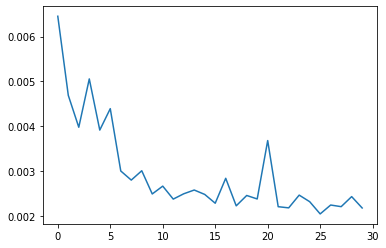

In [11]:
plt.plot(history.history['val_loss'])
#plt.yscale('log')

In [12]:
# Fit model on training data
#model.fit(x_train, y_train, epochs=4)

In [13]:
# Evaluate neural network performance
model.evaluate(x_test,  y_test, verbose=2)


313/313 - 0s - loss: 7.6750e-04 - mean_absolute_error: 0.0205 - 369ms/epoch - 1ms/step


[0.0007674966473132372, 0.020508304238319397]

In [14]:
preresults = model.predict(x_test)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 100)               100100    
                                                                 
 dense_2 (Dense)             (None, 1000)              101000    
                                                                 
 dense_3 (Dense)             (None, 500)               500500    
                                                                 
 dense_4 (Dense)             (None, 100)               50100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,752,801
Trainable params: 1,752,801
Non-

In [16]:
# Build a new model without last layer and freeze other layers of the pre-trained model
model2 = tf.keras.models.Sequential()
for layer in model.layers[:-1]:
    layer.trainable = False
    model2.add(layer)
#model2.add(tf.keras.layers.Dense(75, activation='relu'))
model2.add(tf.keras.layers.Dense(100, activation='relu'))
model2.add(tf.keras.layers.Dense(25, activation='relu'))
# model2.add(tf.keras.layers.Dense(500, activation='relu'))
model2.add(tf.keras.layers.Dense(1))

# compile the model
model2.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=["mean_absolute_error"]
)


In [17]:
trainfeats_df = pd.read_csv("train_features.csv.zip")
trainfeats_df.head()


,Id,smiles,feature_0000,feature_0001,feature_0002,feature_0003,feature_0004,feature_0005,feature_0006,feature_0007,...,feature_0990,feature_0991,feature_0992,feature_0993,feature_0994,feature_0995,feature_0996,feature_0997,feature_0998,feature_0999
0,50000,C1C=c2c3ccoc3c3c4ccccc4c(cc3c2=C1)-c1scc2ccsc12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50001,c1cc([se]c1-c1sc(-c2cccc3nsnc23)c2nccnc12)-c1c...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50002,[SiH2]1C=CC=C1c1cc2cnc3c(sc4ccc5c[nH]cc5c34)c2...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50003,C1C=c2ccc3c4cocc4c4c([se]c5cc(-c6cccs6)c6nsnc6...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50004,C1c(ccc1-c1sc(-c2nccc3nsnc23)c2ccoc12)-c1scc2c...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
trainlabs_df = pd.read_csv("train_labels.csv.zip")
trainlabs_df.head()
trainlabs_df.shape

(100, 2)

In [19]:
train_x = trainfeats_df.drop(['Id', 'smiles'], axis=1).to_numpy()

In [20]:
train_y = trainlabs_df.drop(['Id'], axis=1).to_numpy()

In [21]:
x_train, x_test, y_train, y_test = train_test_split(
    train_x, train_y, test_size=0.2
)

In [26]:
history2 = History()
history2 = model2.fit(train_x, train_y, validation_split=0.2, epochs=400, verbose=2)

Epoch 1/100
3/3 - 0s - loss: 0.0688 - mean_absolute_error: 0.2004 - val_loss: 0.0349 - val_mean_absolute_error: 0.1580 - 32ms/epoch - 11ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0639 - mean_absolute_error: 0.1936 - val_loss: 0.0502 - val_mean_absolute_error: 0.1768 - 16ms/epoch - 5ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0670 - mean_absolute_error: 0.2026 - val_loss: 0.0361 - val_mean_absolute_error: 0.1591 - 18ms/epoch - 6ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0650 - mean_absolute_error: 0.1950 - val_loss: 0.0336 - val_mean_absolute_error: 0.1550 - 17ms/epoch - 6ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0665 - mean_absolute_error: 0.1987 - val_loss: 0.0395 - val_mean_absolute_error: 0.1618 - 18ms/epoch - 6ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0656 - mean_absolute_error: 0.1990 - val_loss: 0.0450 - val_mean_absolute_error: 0.1673 - 18ms/epoch - 6ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0696 - mean_absolute_error: 0.2018 - val_loss: 0.0335 - val_mean_absolute_error: 0.1550 - 18ms/epoch - 6ms/ste

Epoch 58/100
3/3 - 0s - loss: 0.0624 - mean_absolute_error: 0.1941 - val_loss: 0.0346 - val_mean_absolute_error: 0.1524 - 20ms/epoch - 7ms/step
Epoch 59/100
3/3 - 0s - loss: 0.0629 - mean_absolute_error: 0.1977 - val_loss: 0.0332 - val_mean_absolute_error: 0.1510 - 19ms/epoch - 6ms/step
Epoch 60/100
3/3 - 0s - loss: 0.0607 - mean_absolute_error: 0.1910 - val_loss: 0.0431 - val_mean_absolute_error: 0.1631 - 20ms/epoch - 7ms/step
Epoch 61/100
3/3 - 0s - loss: 0.0702 - mean_absolute_error: 0.2070 - val_loss: 0.0422 - val_mean_absolute_error: 0.1620 - 19ms/epoch - 6ms/step
Epoch 62/100
3/3 - 0s - loss: 0.0645 - mean_absolute_error: 0.2001 - val_loss: 0.0355 - val_mean_absolute_error: 0.1558 - 18ms/epoch - 6ms/step
Epoch 63/100
3/3 - 0s - loss: 0.0682 - mean_absolute_error: 0.1987 - val_loss: 0.0372 - val_mean_absolute_error: 0.1568 - 17ms/epoch - 6ms/step
Epoch 64/100
3/3 - 0s - loss: 0.0699 - mean_absolute_error: 0.2087 - val_loss: 0.0633 - val_mean_absolute_error: 0.2029 - 18ms/epoch - 6

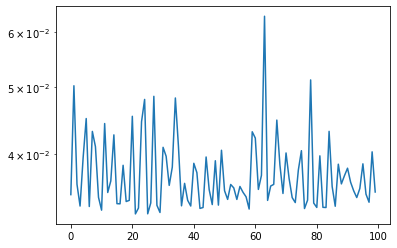

In [27]:
plt.plot(history2.history['val_loss'])
plt.yscale('log')

In [28]:
# Fit model on training data
#model2.fit(x_train, y_train, epochs=1000)

In [29]:
# Evaluate neural network performance
model2.evaluate(x_test,  y_test, verbose=2)


1/1 - 0s - loss: 0.0825 - mean_absolute_error: 0.2086 - 10ms/epoch - 10ms/step


[0.08250995725393295, 0.2086392343044281]

In [30]:
# Finetuning with low changes in ALL weights
model2.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
model2.compile(optimizer=tf.keras.optimizers.Adam(1e-3),  # Very low learning rate
              loss="mean_squared_error",
                metrics=["mean_absolute_error"])

# Fit model on training data
model2.fit(train_x, train_y, validation_split=0.2, epochs=40, verbose=2)

Epoch 1/40
3/3 - 0s - loss: 0.2960 - mean_absolute_error: 0.4253 - val_loss: 0.0774 - val_mean_absolute_error: 0.2315 - 292ms/epoch - 97ms/step
Epoch 2/40
3/3 - 0s - loss: 0.1388 - mean_absolute_error: 0.3116 - val_loss: 0.1280 - val_mean_absolute_error: 0.3115 - 30ms/epoch - 10ms/step
Epoch 3/40
3/3 - 0s - loss: 0.0908 - mean_absolute_error: 0.2444 - val_loss: 0.0395 - val_mean_absolute_error: 0.1634 - 24ms/epoch - 8ms/step
Epoch 4/40
3/3 - 0s - loss: 0.0800 - mean_absolute_error: 0.2190 - val_loss: 0.0602 - val_mean_absolute_error: 0.1988 - 28ms/epoch - 9ms/step
Epoch 5/40
3/3 - 0s - loss: 0.0867 - mean_absolute_error: 0.2317 - val_loss: 0.0390 - val_mean_absolute_error: 0.1683 - 26ms/epoch - 9ms/step
Epoch 6/40
3/3 - 0s - loss: 0.0554 - mean_absolute_error: 0.1791 - val_loss: 0.0649 - val_mean_absolute_error: 0.2021 - 27ms/epoch - 9ms/step
Epoch 7/40
3/3 - 0s - loss: 0.0664 - mean_absolute_error: 0.2068 - val_loss: 0.0677 - val_mean_absolute_error: 0.2084 - 27ms/epoch - 9ms/step
Epo

In [31]:
# Evaluate neural network performance
model2.evaluate(x_test,  y_test, verbose=2)

1/1 - 0s - loss: 0.0031 - mean_absolute_error: 0.0195 - 10ms/epoch - 10ms/step


[0.00305912340991199, 0.019499510526657104]

In [32]:
from sklearn.metrics import mean_squared_error
y_predicted = model2.predict(train_x)
y_true = train_y
mean_squared_error(y_true, y_predicted, squared=False)

0.0745910844477102

In [33]:
test_df = pd.read_csv("test_features.csv.zip")
test_df.head()
test_x = test_df.drop(['Id', 'smiles'], axis=1).to_numpy()
results = model2.predict(test_x)
results

array([[1.8770813],
       [2.1295996],
       [1.7085761],
       ...,
       [1.514987 ],
       [1.8876408],
       [1.6134741]], dtype=float32)

In [63]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_16 (Dense)            (None, 100)               100100    
                                                                 
 dense_17 (Dense)            (None, 1000)              101000    
                                                                 
 dense_24 (Dense)            (None, 100)               100100    
                                                                 
 dense_25 (Dense)            (None, 1)                 101       
                                                                 
Total params: 1,302,301
Trainable params: 1,302,301
Non-trainable params: 0
_________________________________________________________________


In [34]:
results_df = pd.read_csv("sample.csv")
results_df['y'] = results
results_df.to_csv('results.csv', index=False)



In [23]:
# model = LinearRegression().fit(x, y)

In [24]:
# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
# r_sq = model.score(x, y)
# r_sq

In [25]:
# Predict a Response and print it:
# y_pred = model.predict(x)
# print('Predicted response:', y_pred, sep='\n')

In [26]:
import numpy as np